# Fly by Fly

#### Authors: V. Viktor

Description: This project designed to reproduce and build module consist of 3 objects. Initially, objects 1 and 2 are in system 1 where object 3 in system 2 fly near system 1 and desterbit. Our main goal is to see what is going to happen

In this note we will go over our group code. Also, we will try to experiment with different mass, directions etc. So, stay with me for quite sometime

#### Supervisor: Professor Charles Keeton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from astropy import constants as const
from astropy import units as u
from celluloid import Camera

In [2]:
plt.rcParams.update({'font.size': 16, 'text.usetex': True})

In [3]:
# Parameters

M0= const.M_sun.cgs
M1 = 2*const.M_sun.cgs
M2 = 2*const.M_sun.cgs
a = 1*u.au
M = M0+M1
print(a,M)

1.0 AU 5.965426246014431e+33 g


In [4]:
# Total mass

M=M0+M1
meu= (M0*M1)/(M0+M1)

# Radiuse with respect to the center of mass

r0=meu/M0*a
r1=meu/M1*a
r2 = 10*u.au

# define "movement" along y-direction

r2y = 4*u.au
print(r0, r1, r2)

0.6666666666666667 AU 0.33333333333333337 AU 10.0 AU


In [5]:
# Period, G constant

P= np.sqrt((4*np.pi**2)*(a**3)/(const.G*M))
G = const.G
print(P, G)

9.957800565454806e-12 AU(3/2) kg(1/2) s / (g(1/2) m(3/2))   Name   = Gravitational constant
  Value  = 6.67408e-11
  Uncertainty  = 3.1e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2014


In [6]:
# Velocity parameters for df_3body_SI

v0 = 2.0*np.pi*r0/P
v1 = 2.0*np.pi*r1/P
v2 = 5*v0

print(v0.decompose(), v1.decompose())

34392.399691188046 m / s 17196.199845594023 m / s


In [7]:
# Decompose variable b/c Python will not work 
# If unites are inside your equatio
# Moreover, mathematicaly you want your integral be unitless

r0 = r0.decompose().value
r1 = r1.decompose().value
r2 = r2.decompose().value
r2y = r2y.decompose().value

M0 = M0.decompose().value
M1 = M1.decompose().value
M2 = M2.decompose().value

G= G.decompose().value
P = P.decompose().value

v0 = v0.decompose().value
v1 = v1.decompose().value
v2 = v2.decompose().value


In [8]:
#set vec for all bodies 

def df_3body_SI(vec,t):
    
    # 1st body
    
    x0 = vec[0]
    y0 = vec[1]
    z0 = vec[2]
    vx0 = vec[3]
    vy0 = vec[4]
    vz0 = vec[5]
    
    # 2nd body
    
    x1= vec[6]
    y1= vec[7]
    z1= vec[8]
    vx1= vec[9]
    vy1= vec[10]
    vz1= vec[11]
    
    # 3rd body

    x2= vec[12]
    y2= vec[13]
    z2= vec[14]
    vx2= vec[15]
    vy2= vec[16]
    vz2= vec[17]
    
    # define radius with respect to position
    
    r01 = np.sqrt((x1-x0)**2+(y1-y0)**2+(z1-z0)**2)
    r02 = np.sqrt((x2-x0)**2+(y2-y0)**2+(z2-z0)**2)
    r12 = np.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)

    dvec = np.zeros(len(vec))
    dvec[0] = vx0
    dvec[1] = vy0
    dvec[2] = vz0
    dvec[3] = G*M1*(x1-x0)/r01**3 + G*M2*(x2-x0)/r02**3
    dvec[4] = G*M1*(y1-y0)/r01**3 + G*M2*(y2-y0)/r02**3
    dvec[5] = G*M1*(z1-z0)/r01**3 + G*M2*(z2-z0)/r02**3
    
    dvec[6] = vx1
    dvec[7] = vy1
    dvec[8] = vz1
    dvec[9] = G*M0*(x0-x1)/r01**3 + G*M2*(x2-x1)/r12**3
    dvec[10] = G*M0*(y0-y1)/r01**3 + G*M2*(y2-y1)/r12**3
    dvec[11] = G*M0*(z0-z1)/r01**3 + G*M2*(z2-z1)/r12**3
    
    dvec[12] = vy2
    dvec[13] = vz2
    dvec[14] = vx2
    dvec[15] = G*M1*(x1-x2)/r12**3 + G*M0*(x0-x2)/r02**3
    dvec[16] = G*M1*(y1-y2)/r12**3 + G*M0*(y0-y2)/r02**3
    dvec[17] = G*M1*(z1-z2)/r12**3 + G*M0*(z0-z2)/r02**3
    return dvec

In [9]:
# initial radius, initial velocity

tarr= np.linspace(0, 10*P, 700)

# define our direction of the motion for each object
# ([x_1, x_2, y_1, y_2, z_1, z_2... etc. for each body])

vec0 = np.array([r0, 0, 0, 0, v0, 0, -r1, 0, 0, 0, -v1, 0, -r2, r2y, 0, 0, v2, 0])

# find solution

ans0 = integrate.odeint(df_3body_SI, vec0, tarr)


# extract the various variables 1st object

x0 = ans0[:,0]
y0 = ans0[:,1]
z0 = ans0[:,2]
vx0 = ans0[:,3]
vy0 = ans0[:,4]
vz0 = ans0[:,5]

# extract the various variables 2nd object

x1 = ans0[:,6]
y1 = ans0[:,7]
z1 = ans0[:,8]
vx1 = ans0[:,9]
vy1 = ans0[:,10]
vz1 = ans0[:,11]


# extract the various variables 3rd object

x2 = ans0[:,12]
y2 = ans0[:,13]
z2 = ans0[:,14]
vx2 = ans0[:,15]
vy2 = ans0[:,16]
vz2 = ans0[:,17]

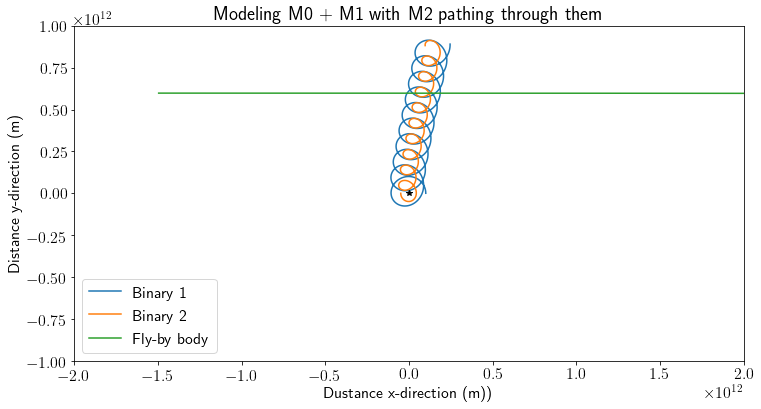

In [10]:
# define sub-lables 

plt.figure(figsize=(12,12))
plt.plot(x0,y0, label = "Binary 1")
plt.plot(x1,y1, label = "Binary 2")
plt.plot(x2,y2, label = "Fly-by body")

# define the name of the graph
# define boundaries after revision

plt.title("Modeling M0 + M1 with M2 pathing through them")
plt.xlim(-2*10**12, 2*10**12)
plt.ylim(-10*10**11, 10*10**11)

# define dimension x vs y

plt.plot(0,0,'*',color='black')
plt.legend(loc='lower left')
plt.xlabel('Dustance x-direction (m)')
plt.ylabel('Distance y-direction (m)')
plt.gca().set_aspect('equal')
plt.show()

In [11]:
from celluloid import Camera

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


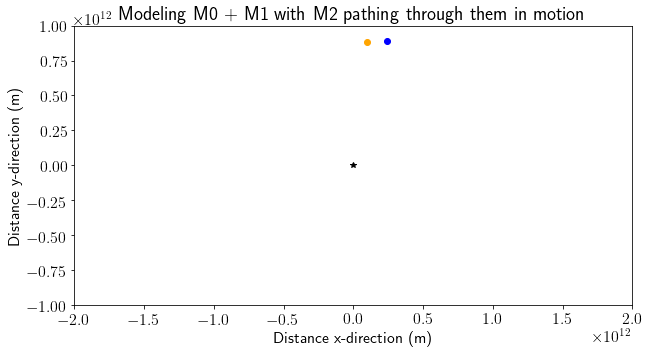

In [12]:
# set up the plot
fig = plt.figure(figsize=(10,10))

camera = Camera(fig)

#set your limits after a revision

plt.title("Modeling M0 + M1 with M2 pathing through them in motion")
plt.xlim(-2*10**12, 2*10**12)
plt.ylim(-10*10**11, 10*10**11)

# set x and y lables

plt.xlabel('Distance x-direction (m)')
plt.ylabel('Distance y-direction (m)')
plt.gca().set_aspect('equal')

# plot our 3 body model with 700 steps
# if it is needed we can change number of steps 2 cells above in "tarr= np.linspace(0, 10*P, 700)"

for tindx in range(len(tarr)):
    plt.plot(x0[tindx],y0[tindx],'o',color='blue')
    plt.plot(x1[tindx],y1[tindx],'o',color='orange')
    plt.plot(x2[tindx],y2[tindx],'o',color='green')
    plt.plot(0,0,'*',color='black')
    camera.snap()
camera.animate().save('movie1.gif',fps=10,dpi=300)

#                                            Sub-Analysis 

# Now Let's consider different masses such as M2 Flys away

#### What is going to happen if mass of our fly by object will 120 M_sun given everything else is a constant (M2 = 120*M_sun)

In [13]:
# Parameters

M0= const.M_sun.cgs
M1 = 2*const.M_sun.cgs
M2 = 120*const.M_sun.cgs
a = 1*u.au
M = M0+M1
print(a,M)

1.0 AU 5.965426246014431e+33 g


In [14]:
#Total mass

M=M0+M1
meu= (M0*M1)/(M0+M1)

#radiuse with respect to the center of mass

r0=meu/M0*a
r1=meu/M1*a
r2 = 10*u.au
print(r0, r1, r2)

0.6666666666666667 AU 0.33333333333333337 AU 10.0 AU


In [15]:
# Period
P= np.sqrt((4*np.pi**2)*(a**3)/(const.G*M))
G = const.G

In [16]:
# define velocity 

v0 = 2.0*np.pi*r0/P
v1 = 2.0*np.pi*r1/P

print(v0.decompose(), v1.decompose())

34392.399691188046 m / s 17196.199845594023 m / s


In [17]:
# Decompose variable b/c Python will not work 
# If unites are inside your equatio
# Moreover, mathematicaly you want your integral be unitless

r0 = r0.decompose().value
r1 = r1.decompose().value
r2 = r2.decompose().value

M0 = M0.decompose().value
M1 = M1.decompose().value
M2 = M2.decompose().value

G= G.decompose().value
P = P.decompose().value

v0 = v0.decompose().value
v1 = v1.decompose().value


In [18]:
# define system of vectors

def df_3body_SI(vec,t):
    x0 = vec[0]
    y0 = vec[1]
    z0 = vec[2]
    vx0 = vec[3]
    vy0 = vec[4]
    vz0 = vec[5]
    
    x1= vec[6]
    y1= vec[7]
    z1= vec[8]
    vx1= vec[9]
    vy1= vec[10]
    vz1= vec[11]

    x2= vec[12]
    y2= vec[13]
    z2= vec[14]
    vx2= vec[15]
    vy2= vec[16]
    vz2= vec[17]
    
    # define radius with respect to position
   
    r01 = np.sqrt((x1-x0)**2+(y1-y0)**2+(z1-z0)**2)
    r02 = np.sqrt((x2-x0)**2+(y2-y0)**2+(z2-z0)**2)
    r12 = np.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)

    dvec = np.zeros(len(vec))
    dvec[0] = vx0
    dvec[1] = vy0
    dvec[2] = vz0
    dvec[3] = G*M1*(x1-x0)/r01**3 + G*M2*(x2-x0)/r02**3
    dvec[4] = G*M1*(y1-y0)/r01**3 + G*M2*(y2-y0)/r02**3
    dvec[5] = G*M1*(z1-z0)/r01**3 + G*M2*(z2-z0)/r02**3
    
    dvec[6] = vx1
    dvec[7] = vy1
    dvec[8] = vz1
    dvec[9] = G*M0*(x0-x1)/r01**3 + G*M2*(x2-x1)/r12**3
    dvec[10] = G*M0*(y0-y1)/r01**3 + G*M2*(y2-y1)/r12**3
    dvec[11] = G*M0*(z0-z1)/r01**3 + G*M2*(z2-z1)/r12**3
    
    dvec[12] = vy2
    dvec[13] = vz2
    dvec[14] = vx2
    dvec[15] = G*M1*(x1-x2)/r12**3 + G*M0*(x0-x2)/r02**3
    dvec[16] = G*M1*(y1-y2)/r12**3 + G*M0*(y0-y2)/r02**3
    dvec[17] = G*M1*(z1-z2)/r12**3 + G*M0*(z0-z2)/r02**3
    return dvec

In [19]:
#initial radius, initial velocity

tarr= np.linspace(0, 10*P, 700)
vec0 = np.array([r0, 0, 0, 0, v0, 0, -r1, 0, 0, 0, -v1, 0, -r2, 0, 0, 0, -v0, 0])
ans0 = integrate.odeint(df_3body_SI, vec0, tarr)


# extract the various variables

x0 = ans0[:,0]
y0 = ans0[:,1]
z0 = ans0[:,2]
vx0 = ans0[:,3]
vy0 = ans0[:,4]
vz0 = ans0[:,5]

# extract the various variables

x1 = ans0[:,6]
y1 = ans0[:,7]
z1 = ans0[:,8]
vx1 = ans0[:,9]
vy1 = ans0[:,10]
vz1 = ans0[:,11]


# extract the various variables

x2 = ans0[:,12]
y2 = ans0[:,13]
z2 = ans0[:,14]
vx2 = ans0[:,15]
vy2 = ans0[:,16]
vz2 = ans0[:,17]

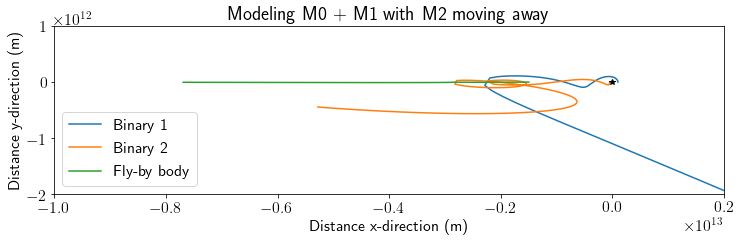

In [20]:
# define sub-lables

plt.figure(figsize=(12,12))
plt.plot(x0,y0, label = "Binary 1")
plt.plot(x1,y1, label = "Binary 2")
plt.plot(x2,y2, label = "Fly-by body")

# mark the star's position

plt.title("Modeling M0 + M1 with M2 moving away")
plt.xlim(-10*10**12, 2*10**12)
plt.ylim(-20*10**11, 10*10**11)

plt.plot(0,0,'*',color='black')
plt.legend(loc='lower left')
plt.xlabel('Distance x-direction (m)')
plt.ylabel('Distance y-direction (m)')
plt.gca().set_aspect('equal')
plt.show()

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


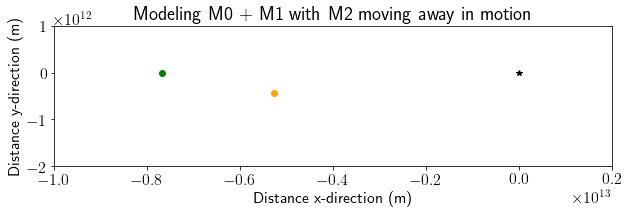

In [21]:
# set up plot in celluloid/in motion

fig = plt.figure(figsize=(10,10))

camera = Camera(fig)

#set your limits after a revision

plt.title("Modeling M0 + M1 with M2 moving away in motion")
plt.xlim(-10*10**12, 2*10**12)
plt.ylim(-20*10**11, 10*10**11)

# set x and y lables

plt.xlabel('Distance x-direction (m)')
plt.ylabel('Distance y-direction (m)')
plt.gca().set_aspect('equal')

# plot our 3 body model with 700 steps
# if it is needed we can change number of steps 2 cells above in "tarr= np.linspace(0, 10*P, 700)"

for tindx in range(len(tarr)):
    plt.plot(x0[tindx],y0[tindx],'o',color='blue')
    plt.plot(x1[tindx],y1[tindx],'o',color='orange')
    plt.plot(x2[tindx],y2[tindx],'o',color='green')
    plt.plot(0,0,'*',color='black')
    camera.snap()
camera.animate().save('120Msun.gif',fps=10,dpi=300)

As we can see the lightest object will fly away. While 2*M_sun object will continue to rotate around 120*M_sun. Important to note that both objects (M_sun and 2*M_sun) will be on the bring of colision with 120*M_sun. One of the main reasons why M_sun will be able to escape 120*M_sun star is due to higher velocity and lower mass. Moreover, initially M_sun tilted further from center of mass. Therefore, it does have greater initial velocity before being interapted by 120*M_sun star

## Possible confusions

Initial system M_sun + 2*M_sun. Star with 120*M_sun flying through system M_sun + 2*M_sun where we left with 2*M_sun + 120*M_sun if both 2*M_sun and M_sun will not be evopirated or being absorbed by 120*M_sun. We consider case where it does not happen

# Consider M0 = 50*M_sun where M1=M2=M_sun

Where M2 moving away from the system of M1 and M2 objects

In [22]:
# Parameters

M0= 50*const.M_sun.cgs
M1 = const.M_sun.cgs
M2 = const.M_sun.cgs
a = 1*u.au
M = M0+M1

In [23]:
#Total mass

M=M0+M1
meu= (M0*M1)/(M0+M1)

#radiuse with respect to the center of mass

r0=meu/M0*a
r1=meu/M1*a
r2 = 10*u.au
print(r0, r1, r2)

0.0196078431372549 AU 0.9803921568627451 AU 10.0 AU


In [24]:
# Period

P= np.sqrt((4*np.pi**2)*(a**3)/(const.G*M))
G = const.G

In [25]:
# deine velocities

v0 = 2.0*np.pi*r0/P
v1 = 2.0*np.pi*r1/P

print(v0.decompose(), v1.decompose())

4170.691077800838 m / s 208534.55389004192 m / s


In [26]:
# Decompose variable b/c Python will not work 
# If unites are inside your equatio
# Moreover, mathematicaly you want your integral be unitless

r0 = r0.decompose().value
r1 = r1.decompose().value
r2 = r2.decompose().value

M0 = M0.decompose().value
M1 = M1.decompose().value
M2 = M2.decompose().value

G= G.decompose().value
P = P.decompose().value

v0 = v0.decompose().value
v1 = v1.decompose().value


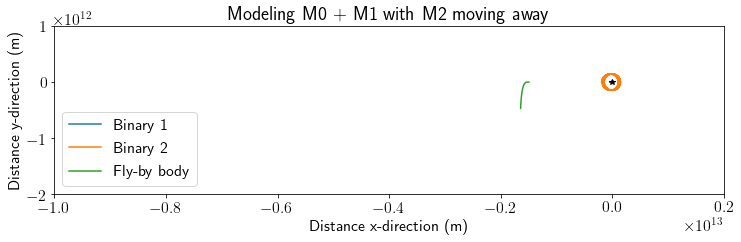

In [27]:
# define system and everything else

def df_3body_SI(vec,t):
    x0 = vec[0]
    y0 = vec[1]
    z0 = vec[2]
    vx0 = vec[3]
    vy0 = vec[4]
    vz0 = vec[5]
    
    x1= vec[6]
    y1= vec[7]
    z1= vec[8]
    vx1= vec[9]
    vy1= vec[10]
    vz1= vec[11]

    x2= vec[12]
    y2= vec[13]
    z2= vec[14]
    vx2= vec[15]
    vy2= vec[16]
    vz2= vec[17]
    
    # define radius with respect to position
    
    r01 = np.sqrt((x1-x0)**2+(y1-y0)**2+(z1-z0)**2)
    r02 = np.sqrt((x2-x0)**2+(y2-y0)**2+(z2-z0)**2)
    r12 = np.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)

    dvec = np.zeros(len(vec))
    dvec[0] = vx0
    dvec[1] = vy0
    dvec[2] = vz0
    dvec[3] = G*M1*(x1-x0)/r01**3 + G*M2*(x2-x0)/r02**3
    dvec[4] = G*M1*(y1-y0)/r01**3 + G*M2*(y2-y0)/r02**3
    dvec[5] = G*M1*(z1-z0)/r01**3 + G*M2*(z2-z0)/r02**3
    
    dvec[6] = vx1
    dvec[7] = vy1
    dvec[8] = vz1
    dvec[9] = G*M0*(x0-x1)/r01**3 + G*M2*(x2-x1)/r12**3
    dvec[10] = G*M0*(y0-y1)/r01**3 + G*M2*(y2-y1)/r12**3
    dvec[11] = G*M0*(z0-z1)/r01**3 + G*M2*(z2-z1)/r12**3
    
    dvec[12] = vy2
    dvec[13] = vz2
    dvec[14] = vx2
    dvec[15] = G*M1*(x1-x2)/r12**3 + G*M0*(x0-x2)/r02**3
    dvec[16] = G*M1*(y1-y2)/r12**3 + G*M0*(y0-y2)/r02**3
    dvec[17] = G*M1*(z1-z2)/r12**3 + G*M0*(z0-z2)/r02**3
    return dvec

#initial radius, initial velocity

tarr= np.linspace(0, 10*P, 700)
vec0 = np.array([r0, 0, 0, 0, v0, 0, -r1, 0, 0, 0, -v1, 0, -r2, 0, 0, 0, -v0, 0])
ans0 = integrate.odeint(df_3body_SI, vec0, tarr)


# extract the various variables

x0 = ans0[:,0]
y0 = ans0[:,1]
z0 = ans0[:,2]
vx0 = ans0[:,3]
vy0 = ans0[:,4]
vz0 = ans0[:,5]

# extract the various variables

x1 = ans0[:,6]
y1 = ans0[:,7]
z1 = ans0[:,8]
vx1 = ans0[:,9]
vy1 = ans0[:,10]
vz1 = ans0[:,11]


# extract the various variables

x2 = ans0[:,12]
y2 = ans0[:,13]
z2 = ans0[:,14]
vx2 = ans0[:,15]
vy2 = ans0[:,16]
vz2 = ans0[:,17]

# set the plot

plt.figure(figsize=(12,12))
plt.plot(x0,y0, label = "Binary 1")
plt.plot(x1,y1, label = "Binary 2")
plt.plot(x2,y2, label = "Fly-by body")

# mark the star's position

plt.title("Modeling M0 + M1 with M2 moving away")
plt.xlim(-10*10**12, 2*10**12)
plt.ylim(-20*10**11, 10*10**11)

plt.plot(0,0,'*',color='black')
plt.legend(loc='lower left')
plt.xlabel('Distance x-direction (m)')
plt.ylabel('Distance y-direction (m)')
plt.gca().set_aspect('equal')
plt.show()

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


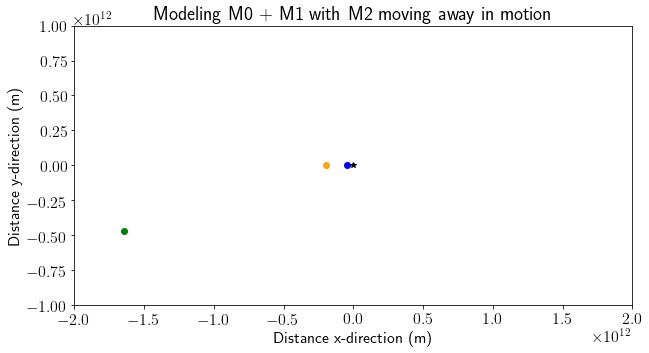

In [28]:
# set up the plot in motion

fig = plt.figure(figsize=(10,10))

camera = Camera(fig)

#set your limits after a revision

plt.title("Modeling M0 + M1 with M2 moving away in motion")
plt.xlim(-0.2*10**13, 0.2*10**13)
plt.ylim(-1*10**12, 1*10**12)

# set x and y lables

plt.xlabel('Distance x-direction (m)')
plt.ylabel('Distance y-direction (m)')
plt.gca().set_aspect('equal')

# plot our 3 body model with 700 steps
# if it is needed we can change number of steps 2 cells above in "tarr= np.linspace(0, 10*P, 700)"

for tindx in range(len(tarr)):
    plt.plot(x0[tindx],y0[tindx],'o',color='blue')
    plt.plot(x1[tindx],y1[tindx],'o',color='orange')
    plt.plot(x2[tindx],y2[tindx],'o',color='green')
    plt.plot(0,0,'*',color='black')
    camera.snap()
camera.animate().save('50Msun.gif',fps=10,dpi=300)

As we can see blue object with mass M2 will travel in curve trajectory while system M0 + M2 almost unchange. Main cause of such behavior is that M2 << than (M0 + M1). Simultaniuselly gravitational Force will change with respect to position of M1. Such motion changes the direction of M2 from linear to curve like structure

### Note

System M0 + M1 will continue to move forward, while M2 will change its derection, but will not fall in system M0 + M1. In other words, M2 continue to move forward an explore endless universe

# Consider Fly through object M2 = 120*M_sun

#### What is going to happen if mass of our fly through object will be 120*M_sun given everything else is constant (M2 = 120*M_sun)

In [29]:
# Parameters

M0= const.M_sun.cgs
M1 = 2*const.M_sun.cgs
M2 = 120*const.M_sun.cgs
a = 1*u.au
M = M0+M1

In [30]:
# Total mass

M=M0+M1
meu= (M0*M1)/(M0+M1)

# Radiuse with respect to the center of mass

r0=meu/M0*a
r1=meu/M1*a
r2 = 10*u.au
r2y = 4*u.au

In [31]:
# Period

P= np.sqrt((4*np.pi**2)*(a**3)/(const.G*M))
G = const.G

In [32]:
# Parameters for df_3body_cgs

v0 = 2.0*np.pi*r0/P
v1 = 2.0*np.pi*r1/P
v2 = 5*v0

print(v0.decompose(), v1.decompose())

34392.399691188046 m / s 17196.199845594023 m / s


In [33]:
# Decompose variable b/c Python will not work 
# If unites are inside your equatio
# Moreover, mathematicaly you want your integral be unitless

r0 = r0.decompose().value
r1 = r1.decompose().value
r2 = r2.decompose().value
r2y = r2y.decompose().value

M0 = M0.decompose().value
M1 = M1.decompose().value
M2 = M2.decompose().value

G= G.decompose().value
P = P.decompose().value

v0 = v0.decompose().value
v1 = v1.decompose().value
v2 = v2.decompose().value


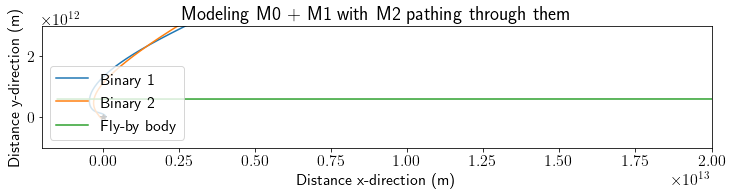

In [34]:
# define system and everything else

def df_3body_SI(vec,t):
    x0 = vec[0]
    y0 = vec[1]
    z0 = vec[2]
    vx0 = vec[3]
    vy0 = vec[4]
    vz0 = vec[5]
    
    x1= vec[6]
    y1= vec[7]
    z1= vec[8]
    vx1= vec[9]
    vy1= vec[10]
    vz1= vec[11]

    x2= vec[12]
    y2= vec[13]
    z2= vec[14]
    vx2= vec[15]
    vy2= vec[16]
    vz2= vec[17]
    
    # define radius with respect to position
    
    r01 = np.sqrt((x1-x0)**2+(y1-y0)**2+(z1-z0)**2)
    r02 = np.sqrt((x2-x0)**2+(y2-y0)**2+(z2-z0)**2)
    r12 = np.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)

    dvec = np.zeros(len(vec))
    dvec[0] = vx0
    dvec[1] = vy0
    dvec[2] = vz0
    dvec[3] = G*M1*(x1-x0)/r01**3 + G*M2*(x2-x0)/r02**3
    dvec[4] = G*M1*(y1-y0)/r01**3 + G*M2*(y2-y0)/r02**3
    dvec[5] = G*M1*(z1-z0)/r01**3 + G*M2*(z2-z0)/r02**3
    
    dvec[6] = vx1
    dvec[7] = vy1
    dvec[8] = vz1
    dvec[9] = G*M0*(x0-x1)/r01**3 + G*M2*(x2-x1)/r12**3
    dvec[10] = G*M0*(y0-y1)/r01**3 + G*M2*(y2-y1)/r12**3
    dvec[11] = G*M0*(z0-z1)/r01**3 + G*M2*(z2-z1)/r12**3
    
    dvec[12] = vy2
    dvec[13] = vz2
    dvec[14] = vx2
    dvec[15] = G*M1*(x1-x2)/r12**3 + G*M0*(x0-x2)/r02**3
    dvec[16] = G*M1*(y1-y2)/r12**3 + G*M0*(y0-y2)/r02**3
    dvec[17] = G*M1*(z1-z2)/r12**3 + G*M0*(z0-z2)/r02**3
    return dvec

#initial radius, initial velocity

tarr= np.linspace(0, 10*P, 700)
vec0 = np.array([r0, 0, 0, 0, v0, 0, -r1, 0, 0, 0, -v1, 0, -r2, r2y, 0, 0, v2, 0])
ans0 = integrate.odeint(df_3body_SI, vec0, tarr)


# extract the various variables

x0 = ans0[:,0]
y0 = ans0[:,1]
z0 = ans0[:,2]
vx0 = ans0[:,3]
vy0 = ans0[:,4]
vz0 = ans0[:,5]

# extract the various variables

x1 = ans0[:,6]
y1 = ans0[:,7]
z1 = ans0[:,8]
vx1 = ans0[:,9]
vy1 = ans0[:,10]
vz1 = ans0[:,11]


# extract the various variables

x2 = ans0[:,12]
y2 = ans0[:,13]
z2 = ans0[:,14]
vx2 = ans0[:,15]
vy2 = ans0[:,16]
vz2 = ans0[:,17]

# set the plot

plt.figure(figsize=(12,12))
plt.plot(x0,y0, label = "Binary 1")
plt.plot(x1,y1, label = "Binary 2")
plt.plot(x2,y2, label = "Fly-by body")



plt.title("Modeling M0 + M1 with M2 pathing through them")
plt.xlim(-0.2*10**13, 2*10**13)
plt.ylim(-1*10**12, 3*10**12)

plt.plot(0,0,'*',color='black')
plt.legend(loc='lower left')
plt.xlabel('Distance x-direction (m)')
plt.ylabel('Distance y-direction (m)')
plt.gca().set_aspect('equal')
plt.show()

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


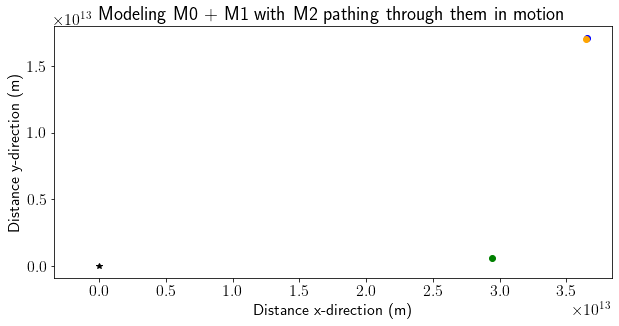

In [35]:
# set up the plot in motion

fig = plt.figure(figsize=(10,10))

camera = Camera(fig)

#set your limits after a revision

plt.title("Modeling M0 + M1 with M2 pathing through them in motion")


# set x and y lables

plt.xlabel('Distance x-direction (m)')
plt.ylabel('Distance y-direction (m)')
plt.gca().set_aspect('equal')

# plot our 3 body model with 700 steps
# if it is needed we can change number of steps 2 cells above in "tarr= np.linspace(0, 10*P, 700)"

for tindx in range(len(tarr)):
    plt.plot(x0[tindx],y0[tindx],'o',color='blue')
    plt.plot(x1[tindx],y1[tindx],'o',color='orange')
    plt.plot(x2[tindx],y2[tindx],'o',color='green')
    plt.plot(0,0,'*',color='black')
    camera.snap()
camera.animate().save('120MsunFlyThrough.gif',fps=10,dpi=300)

Conclude that sytem M0, M1 flys away from M2. Due to high speed of M2 relative to the system of M0 & M1 and its closed distance from M0 and M2. We could observe that M0 and M1 flies away from M2 instead of being traped. Moreover, M0 and M1 gets closer to each other.

# Fly through M2 = M1 = M_sun while in system M1 + M0, M0 = 50*M_sun

In [36]:
# Parameters

M0= 50*const.M_sun.cgs
M1 = const.M_sun.cgs
M2 = const.M_sun.cgs
a = 1*u.au
M = M0+M1

In [37]:
# Total mass

M=M0+M1
meu= (M0*M1)/(M0+M1)

# Radiuse with respect to the center of mass

r0=meu/M0*a
r1=meu/M1*a
r2 = 10*u.au
r2y = 4*u.au

In [38]:
# Period

P= np.sqrt((4*np.pi**2)*(a**3)/(const.G*M))
G = const.G

In [39]:
# Parameters for df_3body_cgs

v0 = 2.0*np.pi*r0/P
v1 = 2.0*np.pi*r1/P
v2 = 5*v0

print(v0.decompose(), v1.decompose())

4170.691077800838 m / s 208534.55389004192 m / s


In [40]:
# Decompose variable b/c Python will not work 
# If unites are inside your equatio
# Moreover, mathematicaly you want your integral be unitless

r0 = r0.decompose().value
r1 = r1.decompose().value
r2 = r2.decompose().value
r2y = r2y.decompose().value

M0 = M0.decompose().value
M1 = M1.decompose().value
M2 = M2.decompose().value

G= G.decompose().value
P = P.decompose().value

v0 = v0.decompose().value
v1 = v1.decompose().value
v2 = v2.decompose().value


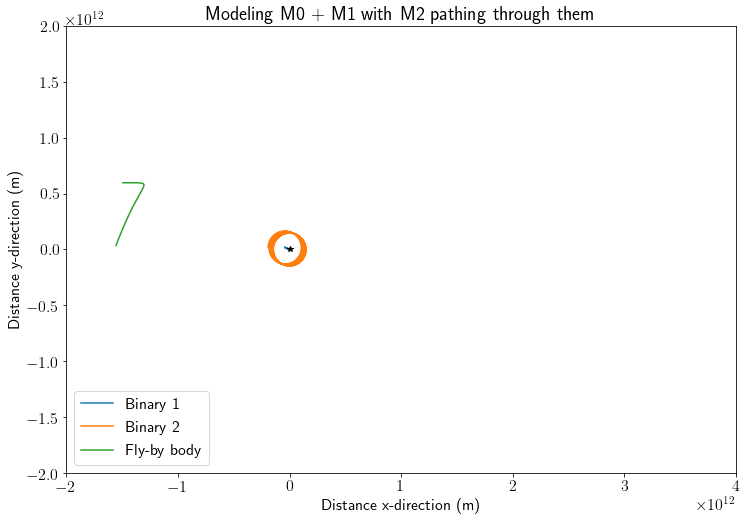

In [41]:
# define system and everything else

def df_3body_SI(vec,t):
    x0 = vec[0]
    y0 = vec[1]
    z0 = vec[2]
    vx0 = vec[3]
    vy0 = vec[4]
    vz0 = vec[5]
    
    x1= vec[6]
    y1= vec[7]
    z1= vec[8]
    vx1= vec[9]
    vy1= vec[10]
    vz1= vec[11]

    x2= vec[12]
    y2= vec[13]
    z2= vec[14]
    vx2= vec[15]
    vy2= vec[16]
    vz2= vec[17]
    
    # define radius with respect to position
    
    r01 = np.sqrt((x1-x0)**2+(y1-y0)**2+(z1-z0)**2)
    r02 = np.sqrt((x2-x0)**2+(y2-y0)**2+(z2-z0)**2)
    r12 = np.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)

    dvec = np.zeros(len(vec))
    dvec[0] = vx0
    dvec[1] = vy0
    dvec[2] = vz0
    dvec[3] = G*M1*(x1-x0)/r01**3 + G*M2*(x2-x0)/r02**3
    dvec[4] = G*M1*(y1-y0)/r01**3 + G*M2*(y2-y0)/r02**3
    dvec[5] = G*M1*(z1-z0)/r01**3 + G*M2*(z2-z0)/r02**3
    
    dvec[6] = vx1
    dvec[7] = vy1
    dvec[8] = vz1
    dvec[9] = G*M0*(x0-x1)/r01**3 + G*M2*(x2-x1)/r12**3
    dvec[10] = G*M0*(y0-y1)/r01**3 + G*M2*(y2-y1)/r12**3
    dvec[11] = G*M0*(z0-z1)/r01**3 + G*M2*(z2-z1)/r12**3
    
    dvec[12] = vy2
    dvec[13] = vz2
    dvec[14] = vx2
    dvec[15] = G*M1*(x1-x2)/r12**3 + G*M0*(x0-x2)/r02**3
    dvec[16] = G*M1*(y1-y2)/r12**3 + G*M0*(y0-y2)/r02**3
    dvec[17] = G*M1*(z1-z2)/r12**3 + G*M0*(z0-z2)/r02**3
    return dvec

#initial radius, initial velocity

tarr= np.linspace(0, 10*P, 700)
vec0 = np.array([r0, 0, 0, 0, v0, 0, -r1, 0, 0, 0, -v1, 0, -r2, r2y, 0, 0, v2, 0])
ans0 = integrate.odeint(df_3body_SI, vec0, tarr)


# extract the various variables

x0 = ans0[:,0]
y0 = ans0[:,1]
z0 = ans0[:,2]
vx0 = ans0[:,3]
vy0 = ans0[:,4]
vz0 = ans0[:,5]

# extract the various variables

x1 = ans0[:,6]
y1 = ans0[:,7]
z1 = ans0[:,8]
vx1 = ans0[:,9]
vy1 = ans0[:,10]
vz1 = ans0[:,11]


# extract the various variables

x2 = ans0[:,12]
y2 = ans0[:,13]
z2 = ans0[:,14]
vx2 = ans0[:,15]
vy2 = ans0[:,16]
vz2 = ans0[:,17]

# set the plot

plt.figure(figsize=(12,12))
plt.plot(x0,y0, label = "Binary 1")
plt.plot(x1,y1, label = "Binary 2")
plt.plot(x2,y2, label = "Fly-by body")

# mark the star's position

plt.title("Modeling M0 + M1 with M2 pathing through them")
plt.xlim(-0.2*10**13, 0.4*10**13)
plt.ylim(-2*10**12, 2*10**12)

plt.plot(0,0,'*',color='black')
plt.legend(loc='lower left')
plt.xlabel('Distance x-direction (m)')
plt.ylabel('Distance y-direction (m)')
plt.gca().set_aspect('equal')
plt.show()

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


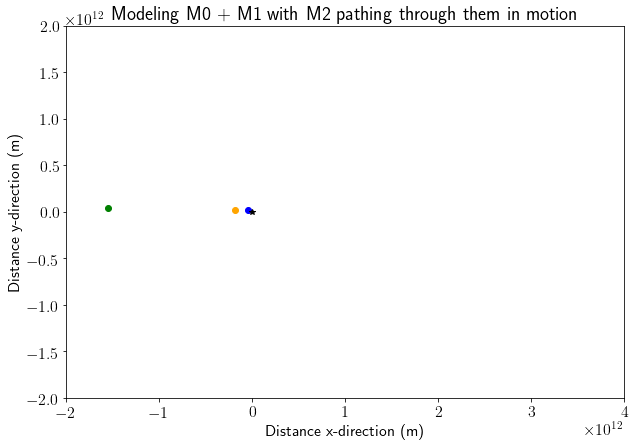

In [42]:
# set up the plot in motion

fig = plt.figure(figsize=(10,10))

camera = Camera(fig)

#set your limits after a revision

plt.title("Modeling M0 + M1 with M2 pathing through them in motion")
plt.xlim(-0.2*10**13, 0.4*10**13)
plt.ylim(-2*10**12, 2*10**12)

# set x and y lables

plt.xlabel('Distance x-direction (m)')
plt.ylabel('Distance y-direction (m)')
plt.gca().set_aspect('equal')

# plot our 3 body model with 700 steps
# if it is needed we can change number of steps 2 cells above in "tarr= np.linspace(0, 10*P, 700)"

for tindx in range(len(tarr)):
    plt.plot(x0[tindx],y0[tindx],'o',color='blue')
    plt.plot(x1[tindx],y1[tindx],'o',color='orange')
    plt.plot(x2[tindx],y2[tindx],'o',color='green')
    plt.plot(0,0,'*',color='black')
    camera.snap()
camera.animate().save('50MsunWithFlyThroughObject.gif',fps=10,dpi=300)

As we can see, M2 getting traped by the system of M0 + M1 and form system consiste of M0 + M1 + M2

# Falidations:

As we saw from the above, in all cases we got results exactly as we expected to be (on the paper). However, there is an elephant in the room. This model does not take into consideration radius of each object and it may cause some miss modeling. In order for this module to be as accurate as it is possible. We will have to add extra lines of code that could specified radius of each object respectively. In general it is okay model